In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [2]:
df=pd.read_csv('diabetes2.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


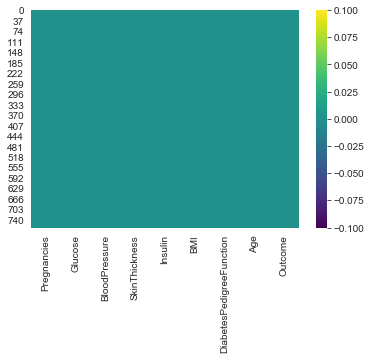

In [6]:
sns.heatmap(df.isnull(),cmap='viridis')

In [7]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
labels=['True','False']
explode=[0.03,0.03]
color=['pink','lightgreen']

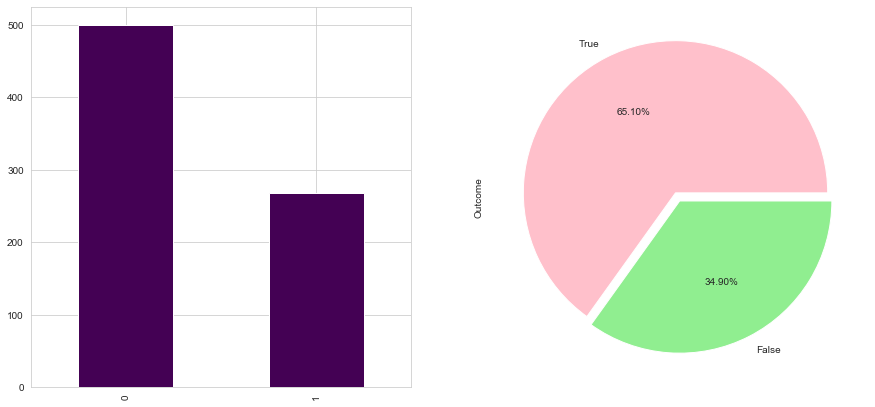

In [9]:
f,ax = plt.subplots(1,2,figsize = (15, 7))
_=df.Outcome.value_counts().plot.bar(ax=ax[0],cmap='viridis')
_=df.Outcome.value_counts().plot.pie(ax=ax[1],labels=labels,autopct='%.2f%%',colors=color,explode=explode)

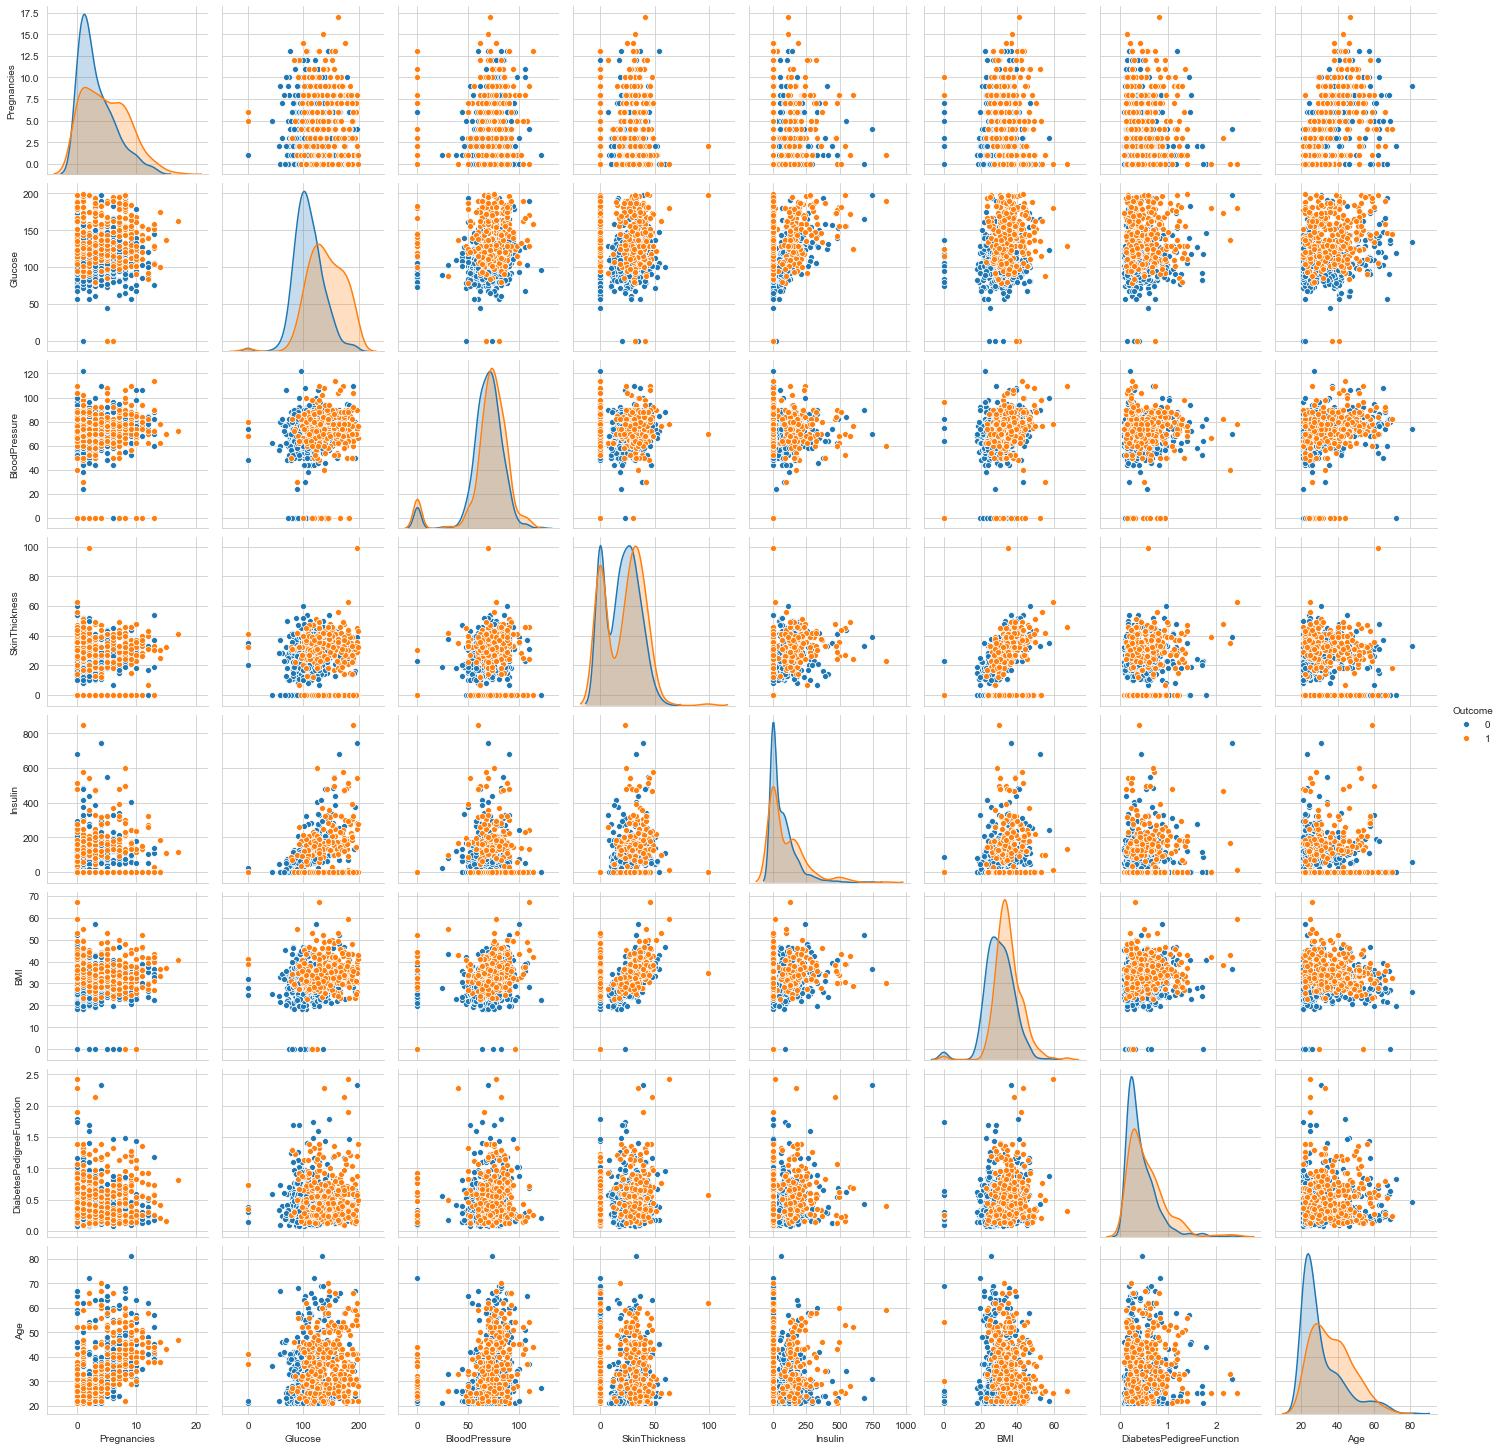

In [10]:
sns.pairplot(df,hue='Outcome')

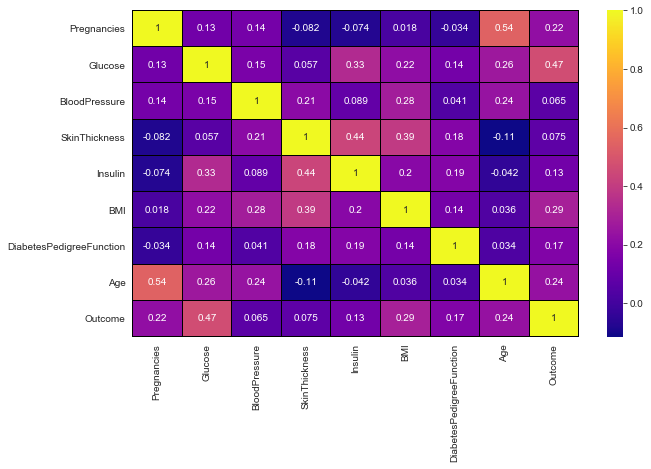

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='plasma',linecolor='black',linewidths=0.01)

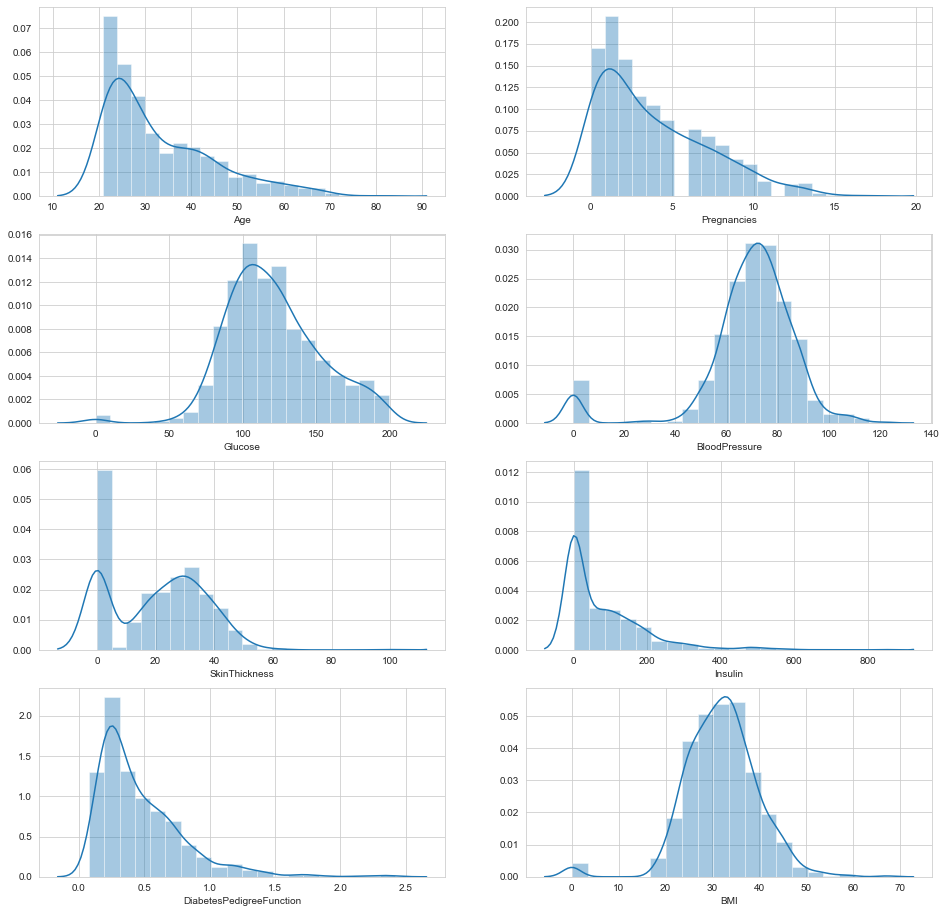

In [12]:
fig, ax = plt.subplots(4,2,figsize=(16,16))
sns.distplot(df.Age,bins=20, ax=ax[0,0]) 
sns.distplot(df.Pregnancies,bins=20,ax=ax[0,1]) 
sns.distplot(df.Glucose,bins=20,ax=ax[1,0]) 
sns.distplot(df.BloodPressure,bins=20,ax=ax[1,1]) 
sns.distplot(df.SkinThickness,bins=20,ax=ax[2,0])
sns.distplot(df.Insulin,bins=20,ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction,bins=20,ax=ax[3,0]) 
sns.distplot(df.BMI,bins=20,ax=ax[3,1]) 

In [13]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

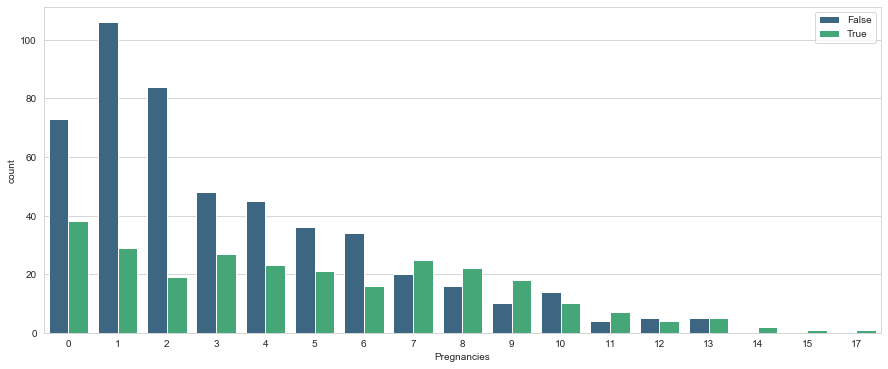

In [14]:
plt.figure(figsize=(15,6))
sns.countplot('Pregnancies',hue='Outcome',data=df,palette='viridis')
plt.legend(loc='upper right',labels=['False','True'])

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
data=df.copy(deep=True)
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
      'BMI', 'DiabetesPedigreeFunction']]=data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']].replace(0,np.NaN)

In [17]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [18]:
data=data.fillna(data.mean())

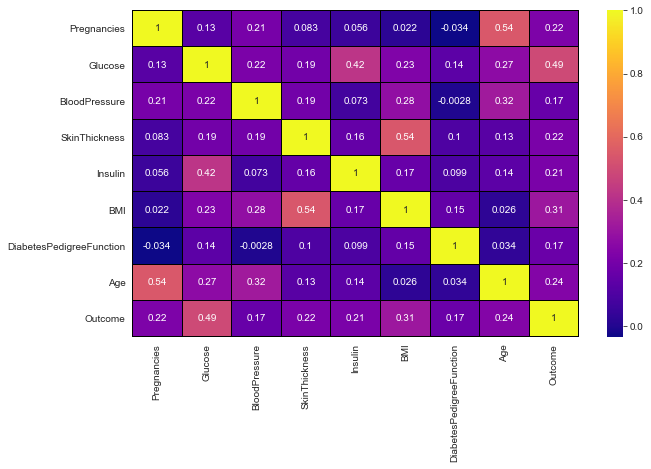

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap='plasma',linecolor='black',linewidths=0.01)

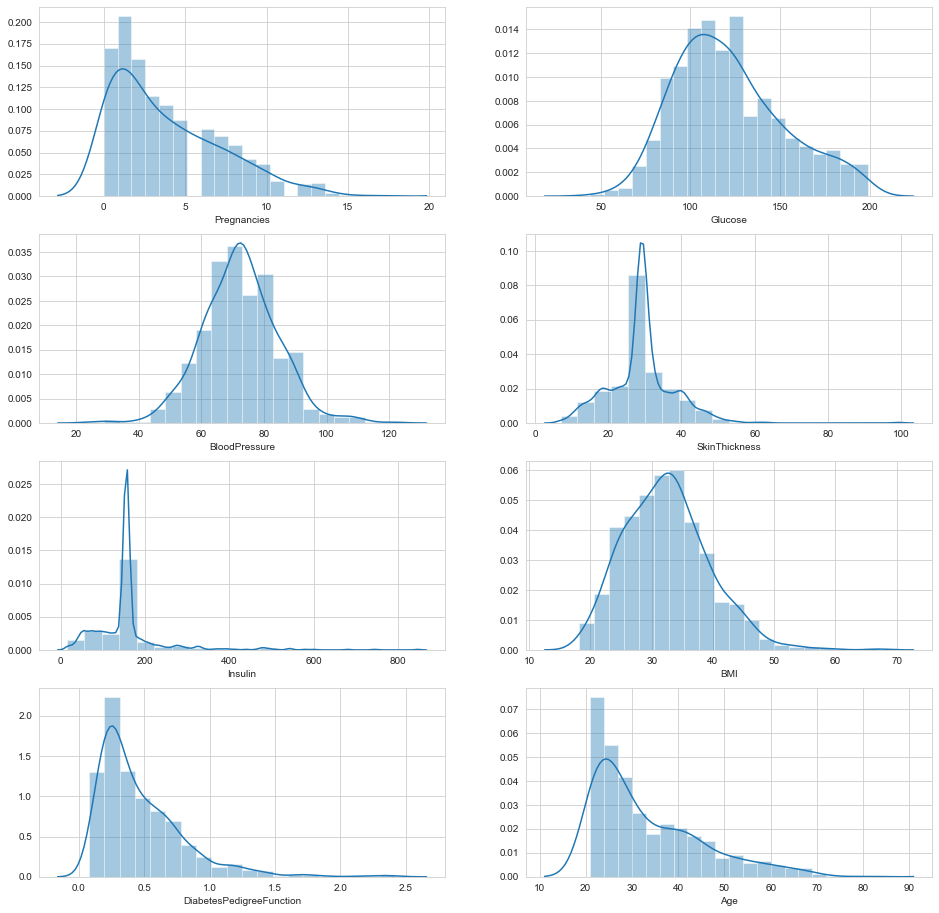

In [20]:
fig,ax=plt.subplots(4,2,figsize=(16,16))
sns.distplot(data['Pregnancies'],ax=ax[0,0],bins=20)
sns.distplot(data['Glucose'],ax=ax[0,1],bins=20)
sns.distplot(data['BloodPressure'],ax=ax[1,0],bins=20)
sns.distplot(data['SkinThickness'],ax=ax[1,1],bins=20)
sns.distplot(data['Insulin'],ax=ax[2,0],bins=20)
sns.distplot(data['BMI'],ax=ax[2,1],bins=20)
sns.distplot(data['DiabetesPedigreeFunction'],ax=ax[3,0],bins=20)
sns.distplot(data['Age'],ax=ax[3,1],bins=20)

In [21]:
X=data.drop('Outcome',axis=1)
y=data['Outcome']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [23]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [24]:
knn=KNeighborsClassifier()
params={'n_neighbors':range(1,21),'p':[1,2,3,4,5,6,7,8,9,10],
        'weights':['distance','uniform'],'leaf_size':range(1,21)}

In [25]:
gs_knn=GridSearchCV(knn,param_grid=params,cv=10,n_jobs=-1)

In [26]:
gs_knn.fit(X_train,y_train)
gs_knn.best_params_

{'leaf_size': 1, 'n_neighbors': 11, 'p': 3, 'weights': 'uniform'}

In [27]:
prediction=gs_knn.predict(X_test)

In [28]:
acc_knn=accuracy_score(y_test,prediction)
print(acc_knn)
print(confusion_matrix(y_test,prediction))

0.7359307359307359
[[123  28]
 [ 33  47]]


In [29]:
probability=gs_knn.predict_proba(X_test)[:,1]

In [30]:
fpr_knn,tpr_knn,thresh=roc_curve(y_test,probability)

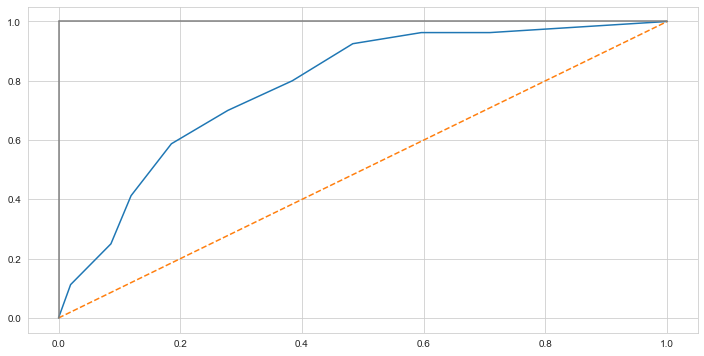

In [31]:
plt.figure(figsize=(12,6))
plt.plot(fpr_knn,tpr_knn)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='0.5')
plt.plot([1,1],c='0.5')

In [32]:
roc_auc_score(y_test,probability)*100

78.25745033112584

In [33]:
log_reg=LogisticRegression()
params={'C':[0.01,0.1,1,10],'max_iter':[100,300,600]}

In [34]:
gs_lr=GridSearchCV(log_reg,param_grid=params,n_jobs=-1,cv=10)

In [35]:
gs_lr.fit(X_train,y_train)
gs_lr.best_params_

{'C': 1, 'max_iter': 100}

In [36]:
prediction=gs_lr.predict(X_test)

In [37]:
acc_lr=accuracy_score(y_test,prediction)
print(acc_lr)
print(confusion_matrix(y_test,prediction))

0.7489177489177489
[[126  25]
 [ 33  47]]


In [38]:
probability=gs_lr.predict_proba(X_test)[:,1]

In [39]:
fpr_lr,tpr_lr,thresh=roc_curve(y_test,probability)

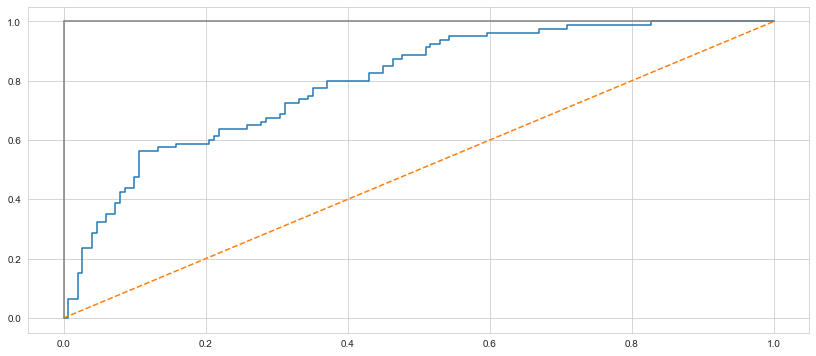

In [40]:
plt.figure(figsize=(14,6))
plt.plot(fpr_lr,tpr_lr)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='0.5')
plt.plot([1,1],c='0.5')

In [41]:
roc_auc_score(y_test,probability)*100

79.6771523178808

In [42]:
dtr=DecisionTreeClassifier()
params={'max_features':["auto", "sqrt", "log2"],'min_samples_leaf':range(1,11),'min_samples_split':range(1,11)}

In [43]:
gs_dtr=GridSearchCV(dtr,param_grid=params,n_jobs=-1,cv=5)

In [44]:
gs_dtr.fit(X_train,y_train)
gs_dtr.best_params_

{'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 4}

In [45]:
prediction=gs_dtr.predict(X_test)

In [46]:
acc_dtr=accuracy_score(y_test,prediction)
print(acc_dtr)
print(confusion_matrix(y_test,prediction))

0.6883116883116883
[[117  34]
 [ 38  42]]


In [47]:
probability=gs_dtr.predict_proba(X_test)[:,1]

In [48]:
fpr_dtr,tpr_dtr,thresh=roc_curve(y_test,probability)

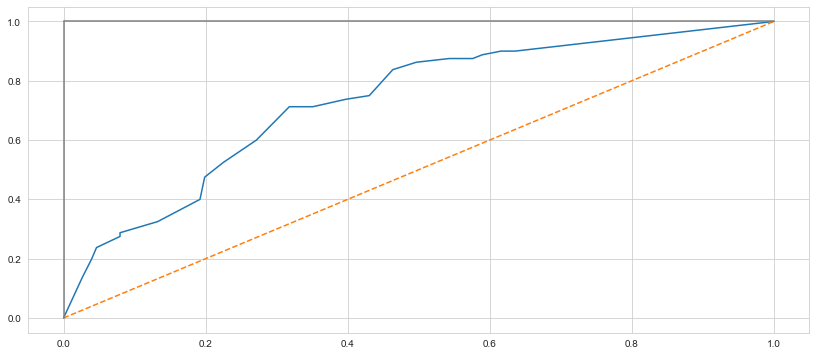

In [49]:
plt.figure(figsize=(14,6))
plt.plot(fpr_dtr,tpr_dtr)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='0.5')
plt.plot([1,1],c='0.5')

In [50]:
roc_auc_score(y_test,probability)*100

72.92218543046356

In [51]:
rfc=RandomForestClassifier()
params={'n_estimators':[100,300,500],'min_samples_leaf':range(1,11)}

In [52]:
gs_rfc=GridSearchCV(rfc,param_grid=params,n_jobs=-1,cv=5)

In [53]:
gs_rfc.fit(X_train,y_train)
gs_rfc.best_params_

{'min_samples_leaf': 3, 'n_estimators': 300}

In [54]:
prediction=gs_rfc.predict(X_test)

In [55]:
acc_rfc=accuracy_score(y_test,prediction)
print(acc_rfc)
print(confusion_matrix(y_test,prediction))

0.7359307359307359
[[120  31]
 [ 30  50]]


In [56]:
probability=gs_rfc.predict_proba(X_test)[:,1]

In [57]:
fpr_rfc,tpr_rfc,thresh=roc_curve(y_test,probability)

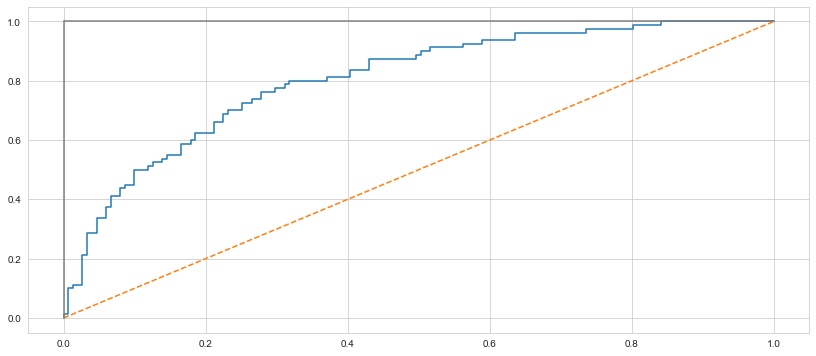

In [58]:
plt.figure(figsize=(14,6))
plt.plot(fpr_rfc,tpr_rfc)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='0.5')
plt.plot([1,1],c='0.5')

In [59]:
roc_auc_score(y_test,probability)*100

80.4884105960265